In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/H1.csv')

In [3]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df['YearWeek'] = df['ArrivalDateYear'].map(str) + '-' + df['ArrivalDateWeekNumber'].map(str)

In [5]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,YearWeek
0,0,342,2015,July,27,1,0,0,2,0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-27
1,0,737,2015,July,27,1,0,0,2,0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-27
2,0,7,2015,July,27,1,0,1,1,0,...,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-27
3,0,13,2015,July,27,1,0,1,1,0,...,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-27
4,0,14,2015,July,27,1,0,2,2,0,...,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-27


<AxesSubplot:xlabel='YearWeek'>

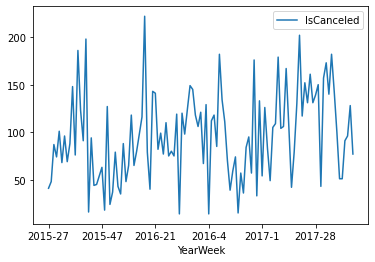

In [6]:
df.groupby(['YearWeek']).agg({'IsCanceled':'sum'}).plot()

In [7]:
canceled_ts = df.groupby(['YearWeek']).agg({'IsCanceled':'sum'}).reset_index()
canceled_ts.head()

,YearWeek,IsCanceled
0,2015-27,41
1,2015-28,48
2,2015-29,87
3,2015-30,74
4,2015-31,101


In [8]:
canceled_ts.describe()

,IsCanceled
count,115.000000
mean,96.713043
std,45.865510
min,14.000000
25%,64.000000
50%,95.000000
75%,127.500000
max,222.000000


In [9]:
# Adding Year Week Monday date as datetime index to pandas
# dt_format = '%Y-%W%w'
# canceled_ts['YearWeekMonday'] = pd.to_datetime(canceled_ts.index + '1', format='%Y-%W%w')
# canceled_ts['YearWeek'] = canceled_ts.index
# canceled_ts = canceled_ts.set_index(pd.DatetimeIndex(canceled_ts['YearWeekMonday']))

In [10]:
canceled_ts.head()

,YearWeek,IsCanceled
0,2015-27,41
1,2015-28,48
2,2015-29,87
3,2015-30,74
4,2015-31,101


<AxesSubplot:>

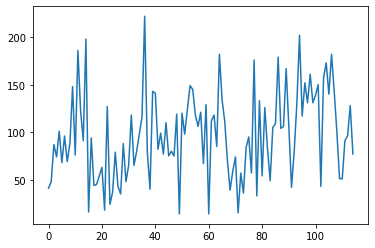

In [11]:
canceled_ts['IsCanceled'].plot()

In [12]:
canceled_ts.index

RangeIndex(start=0, stop=115, step=1)

In [13]:
(canceled_ts['IsCanceled']).name

'IsCanceled'

In [14]:
from matplotlib import pyplot as plt

# Decompose time series into trend, seasonal and residuals

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decompose_result = seasonal_decompose(canceled_ts['IsCanceled'], period=52)

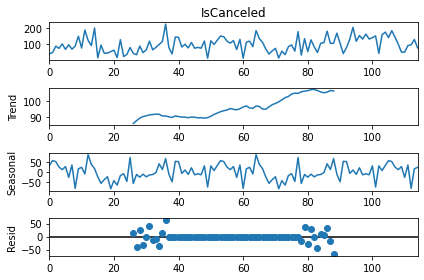

In [17]:
decompose_result.plot()
plt.show()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF

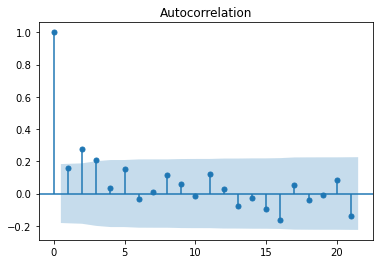

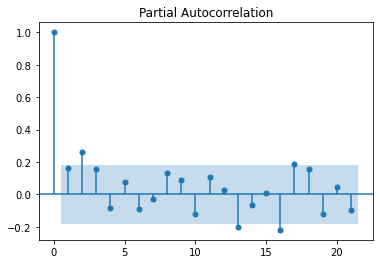

In [19]:
plot_acf(canceled_ts['IsCanceled'])
plot_pacf(canceled_ts['IsCanceled'])

plt.show()

# SMA Window size 4

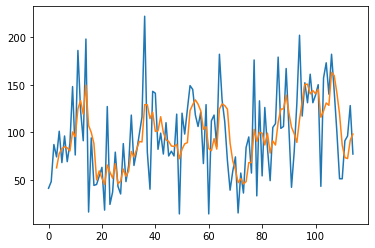

In [20]:
canceled_ts['IsCanceled'].plot()
canceled_ts['IsCanceled'].rolling(window=4).mean().plot()
plt.show()